
#### 2) Salary_hike -> Build a prediction model for Salary_hike

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

#### Loading the dataset for building model

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### <font color= 'Brown'>Performing EDA </font>

### Statistical Details for dataset

In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


#### Finding dimenesions of dataset

In [5]:
rows,col=df.shape
print('No of rows',rows ,'and number of columns are ',col)

No of rows 30 and number of columns are  2


##### Checking Data type of the colume 

In [6]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

#### <font color='Brown'>As we can see that the datatype of columns are good.

##### Checking for null values

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### <font color='Brown'>As we can see that there is no null values in the given dataset.

##### Checking for duplicate values

In [8]:
df.duplicated().sum()

0

##### <font color = 'Brown'> As we can see that there is no invalid values , duplicates or null values in our dataset. We can proceed with further steps. </font>

##### Check if any outliers exist

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

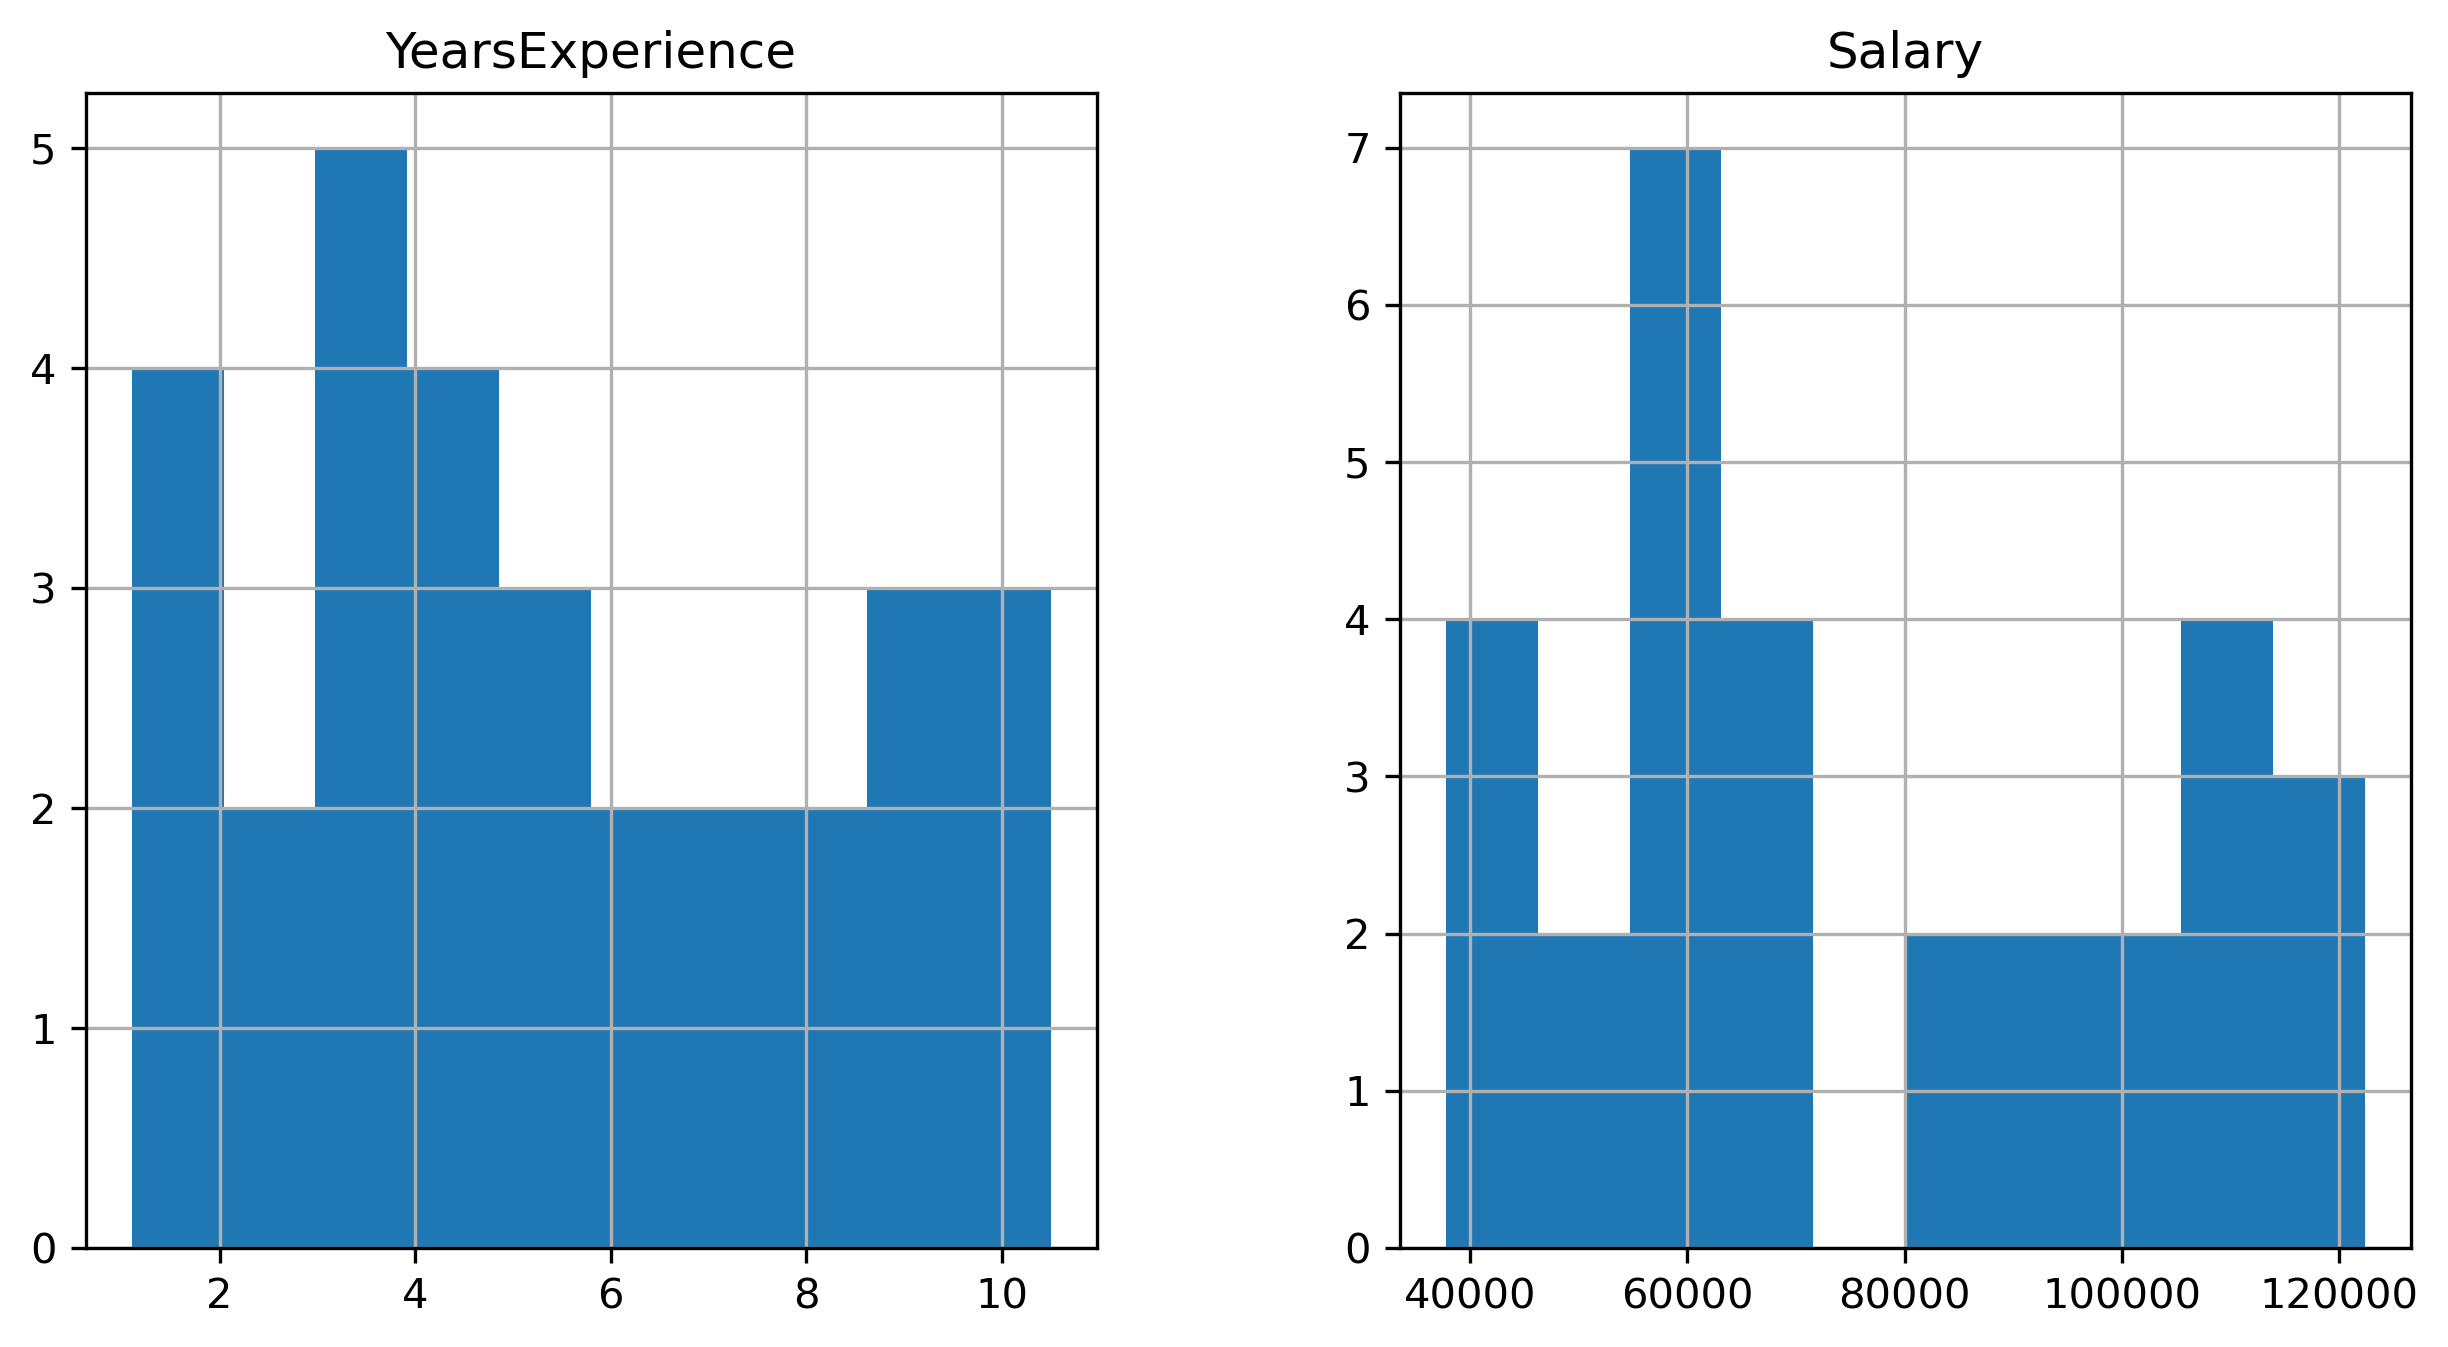

In [9]:
df.hist()

<Axes: >

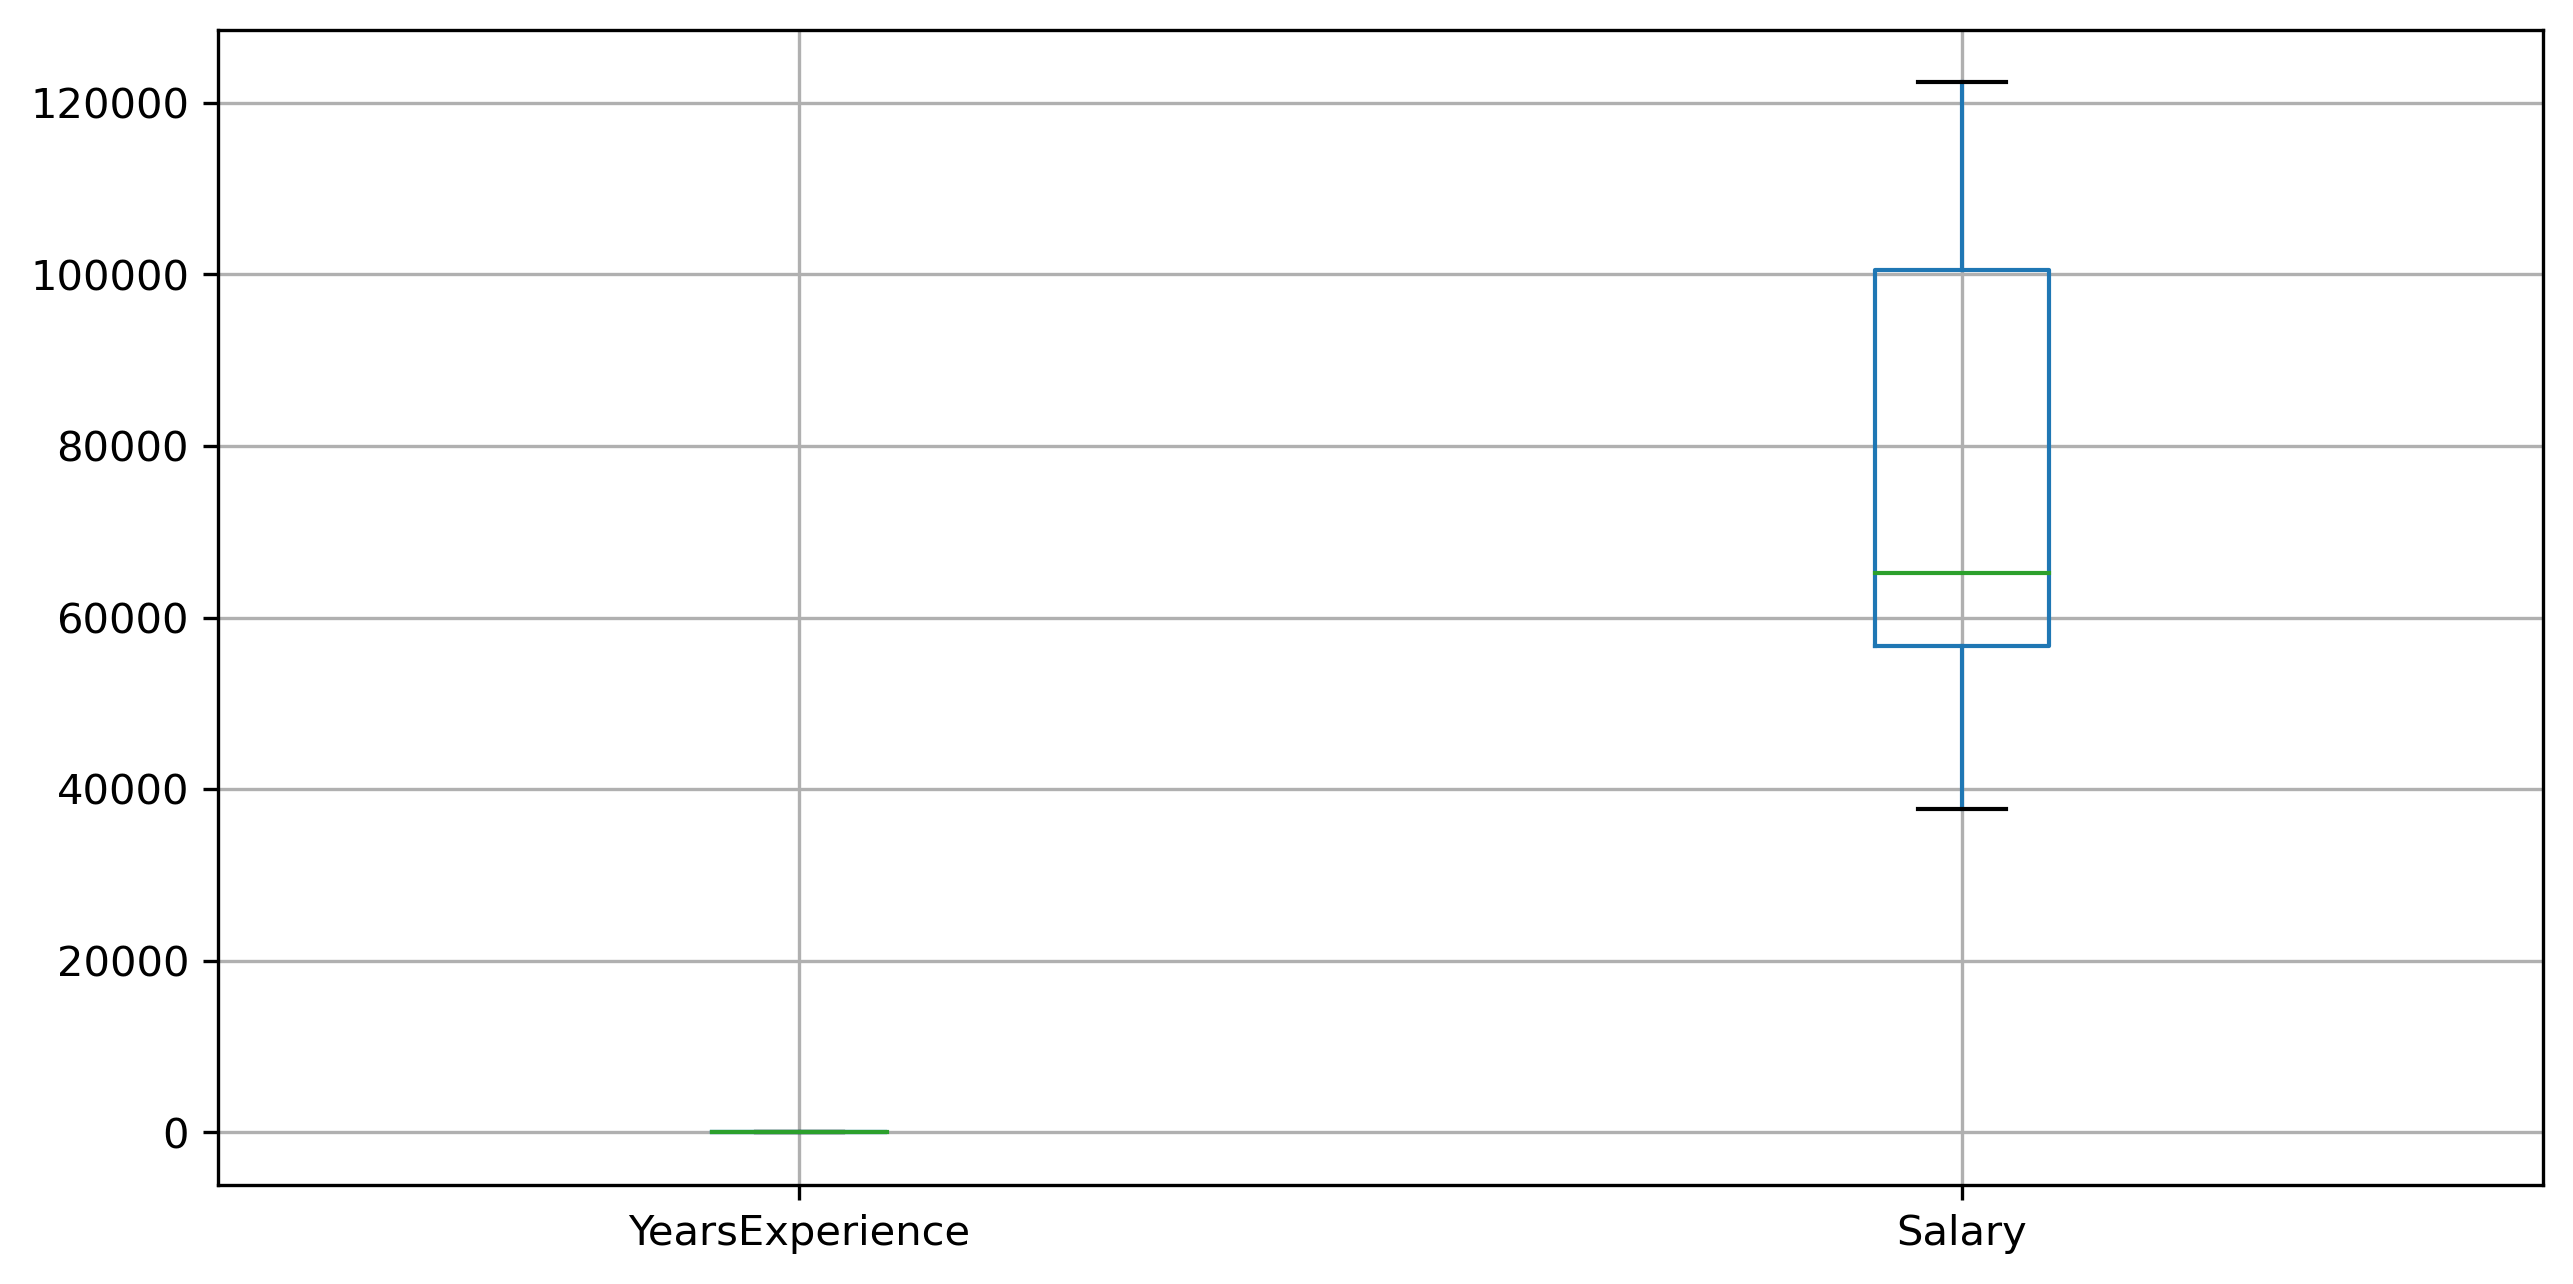

In [10]:
df.boxplot()

<Axes: xlabel='Salary', ylabel='Density'>

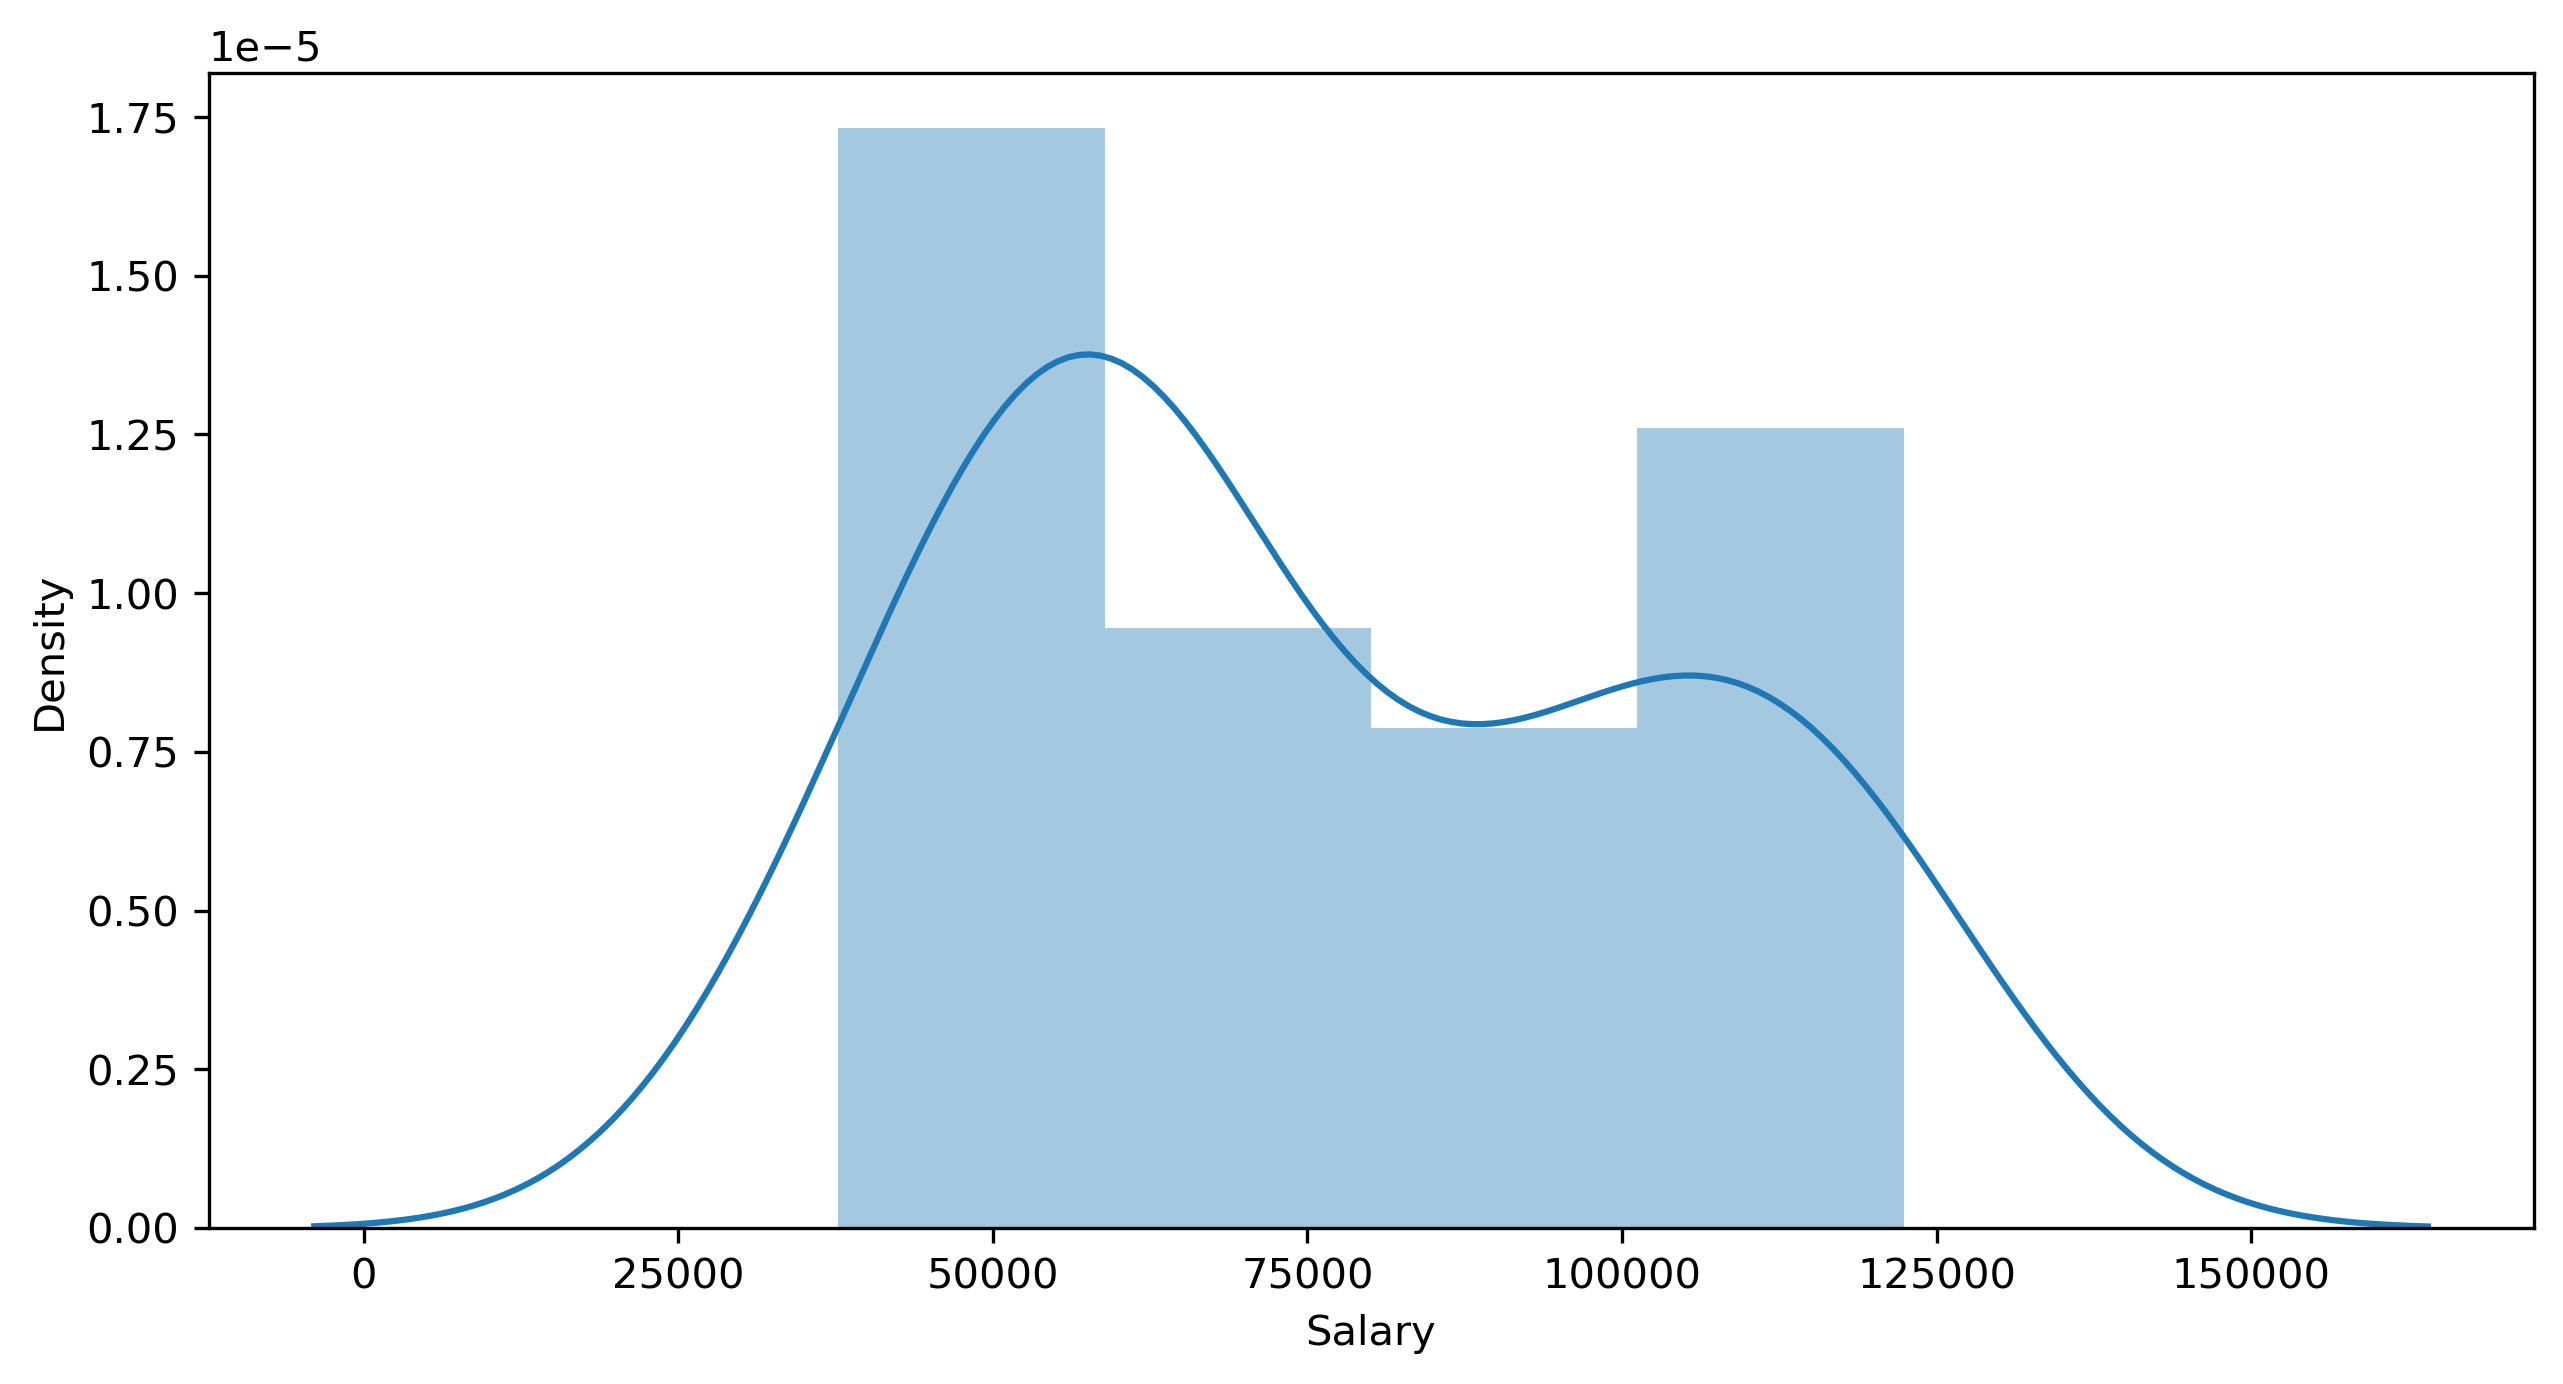

In [11]:
sns.distplot(df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

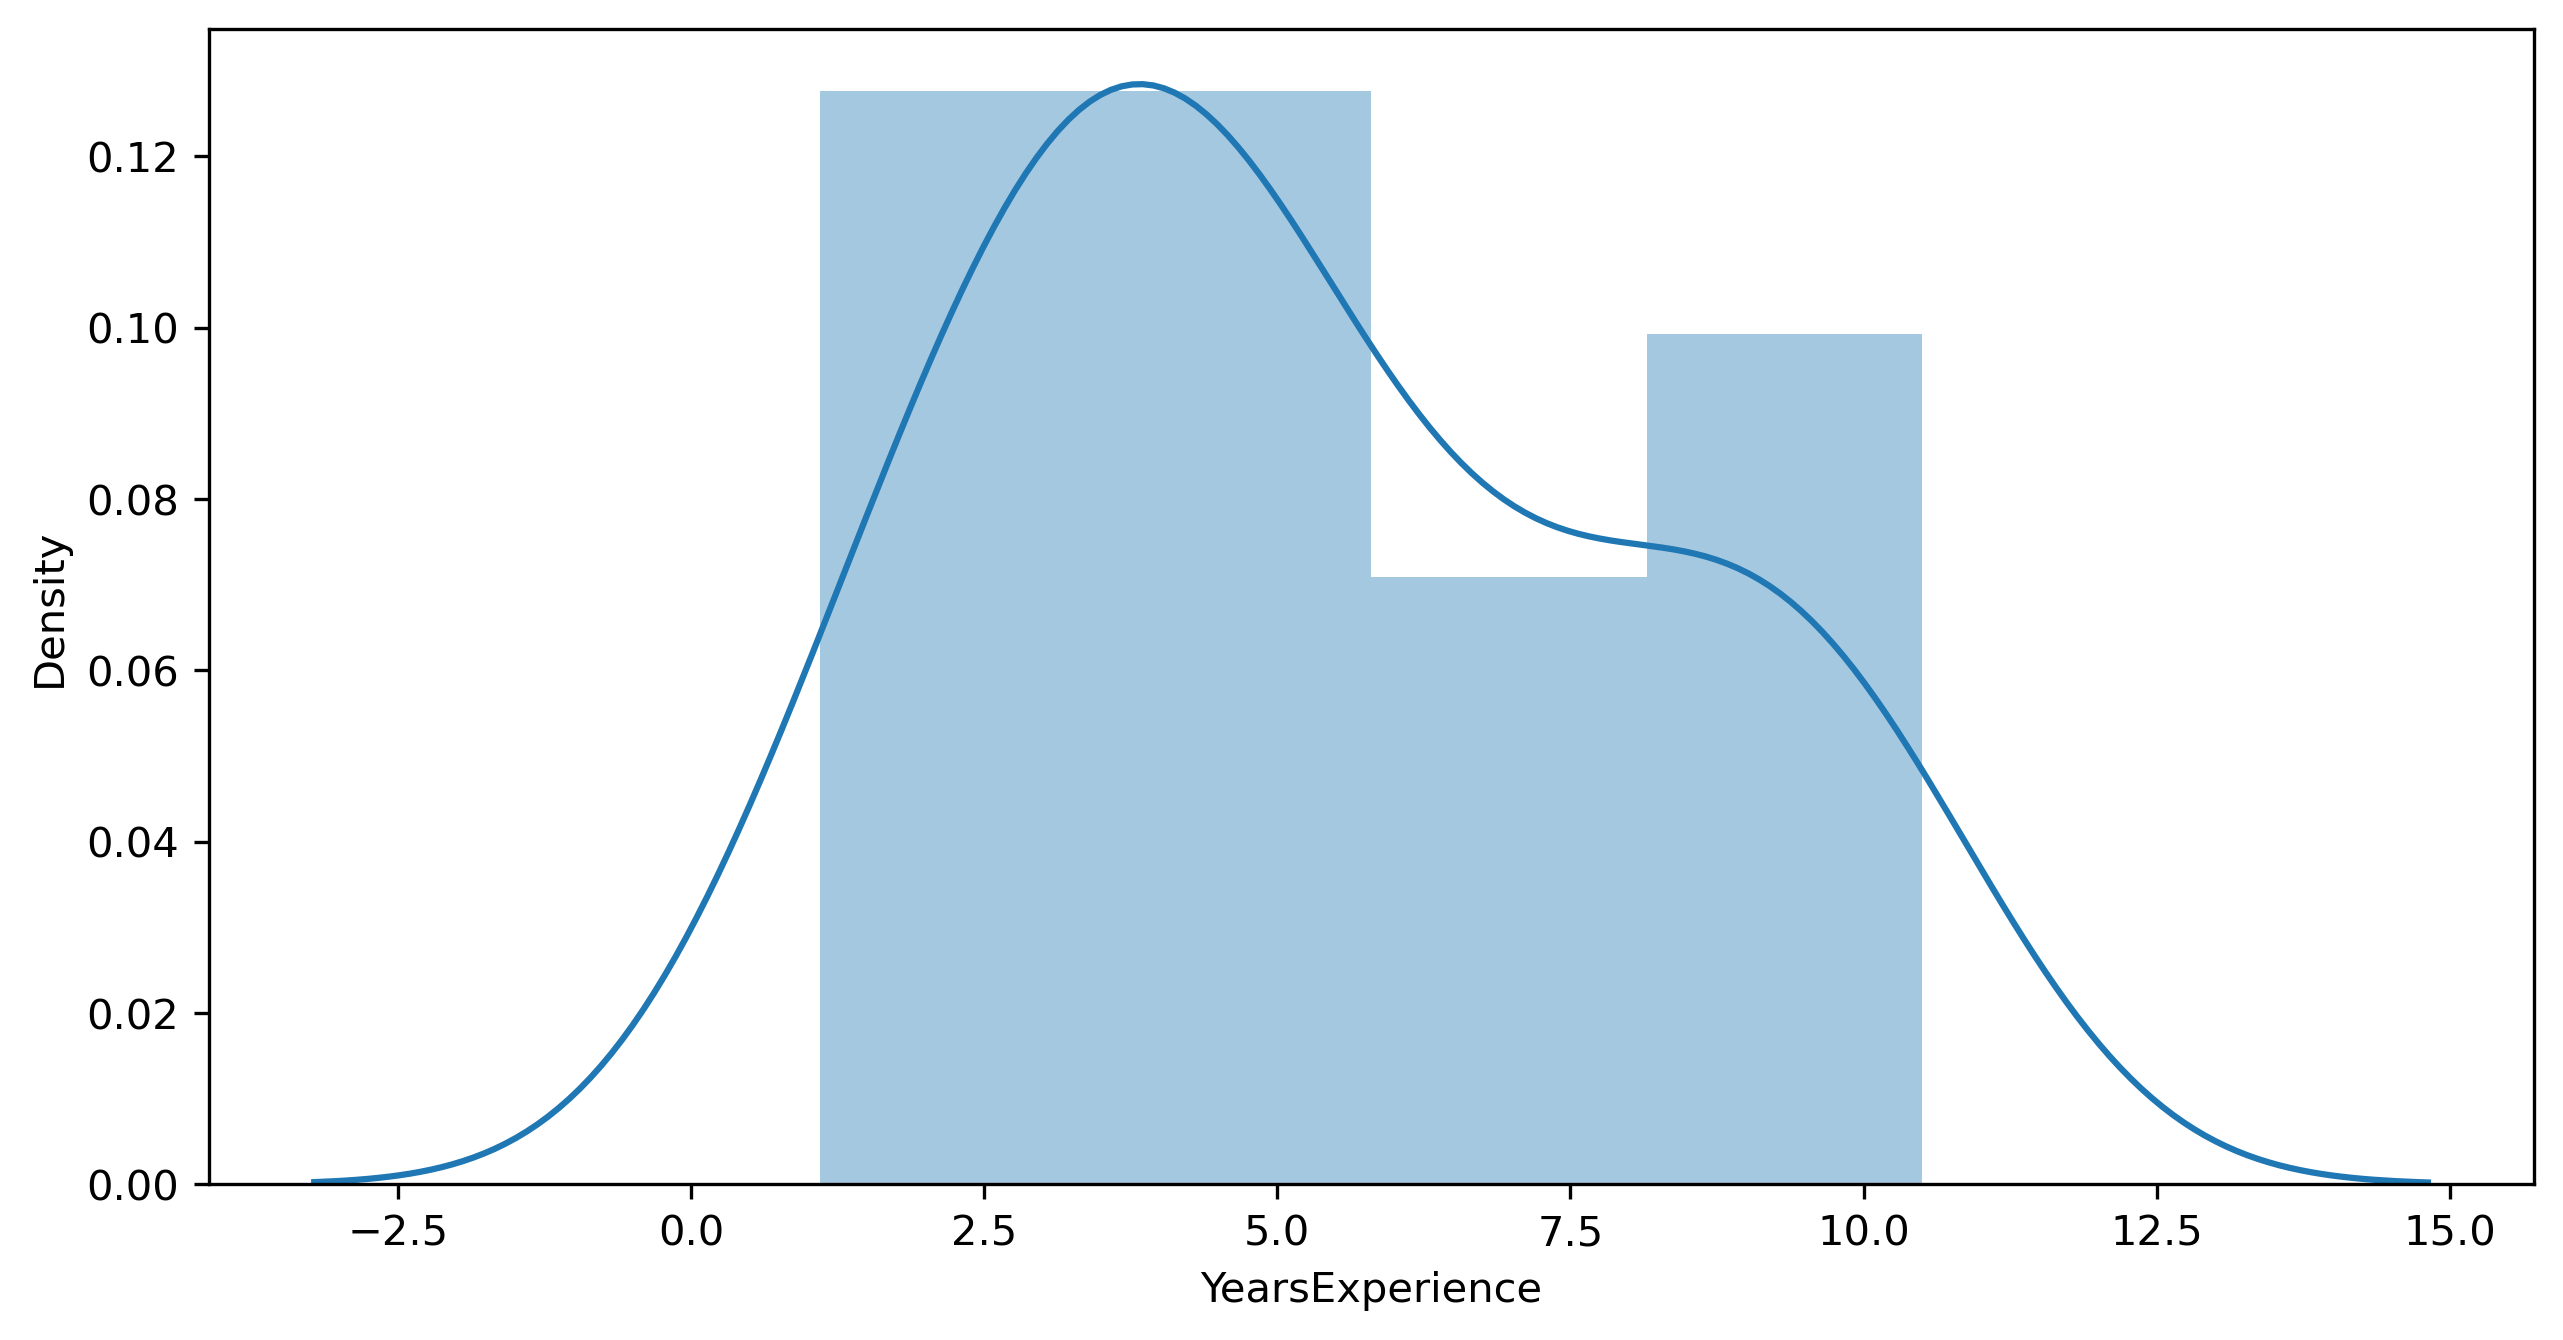

In [12]:
sns.distplot(df['YearsExperience'])

#####  <font color = 'Brown'>Upon seeing the above graphs we can say that there is no outliers in given dataset further we can check for correlation between the coloums. </font> 

#### Find the correlation between the dataset

<Axes: xlabel='YearsExperience', ylabel='Salary'>

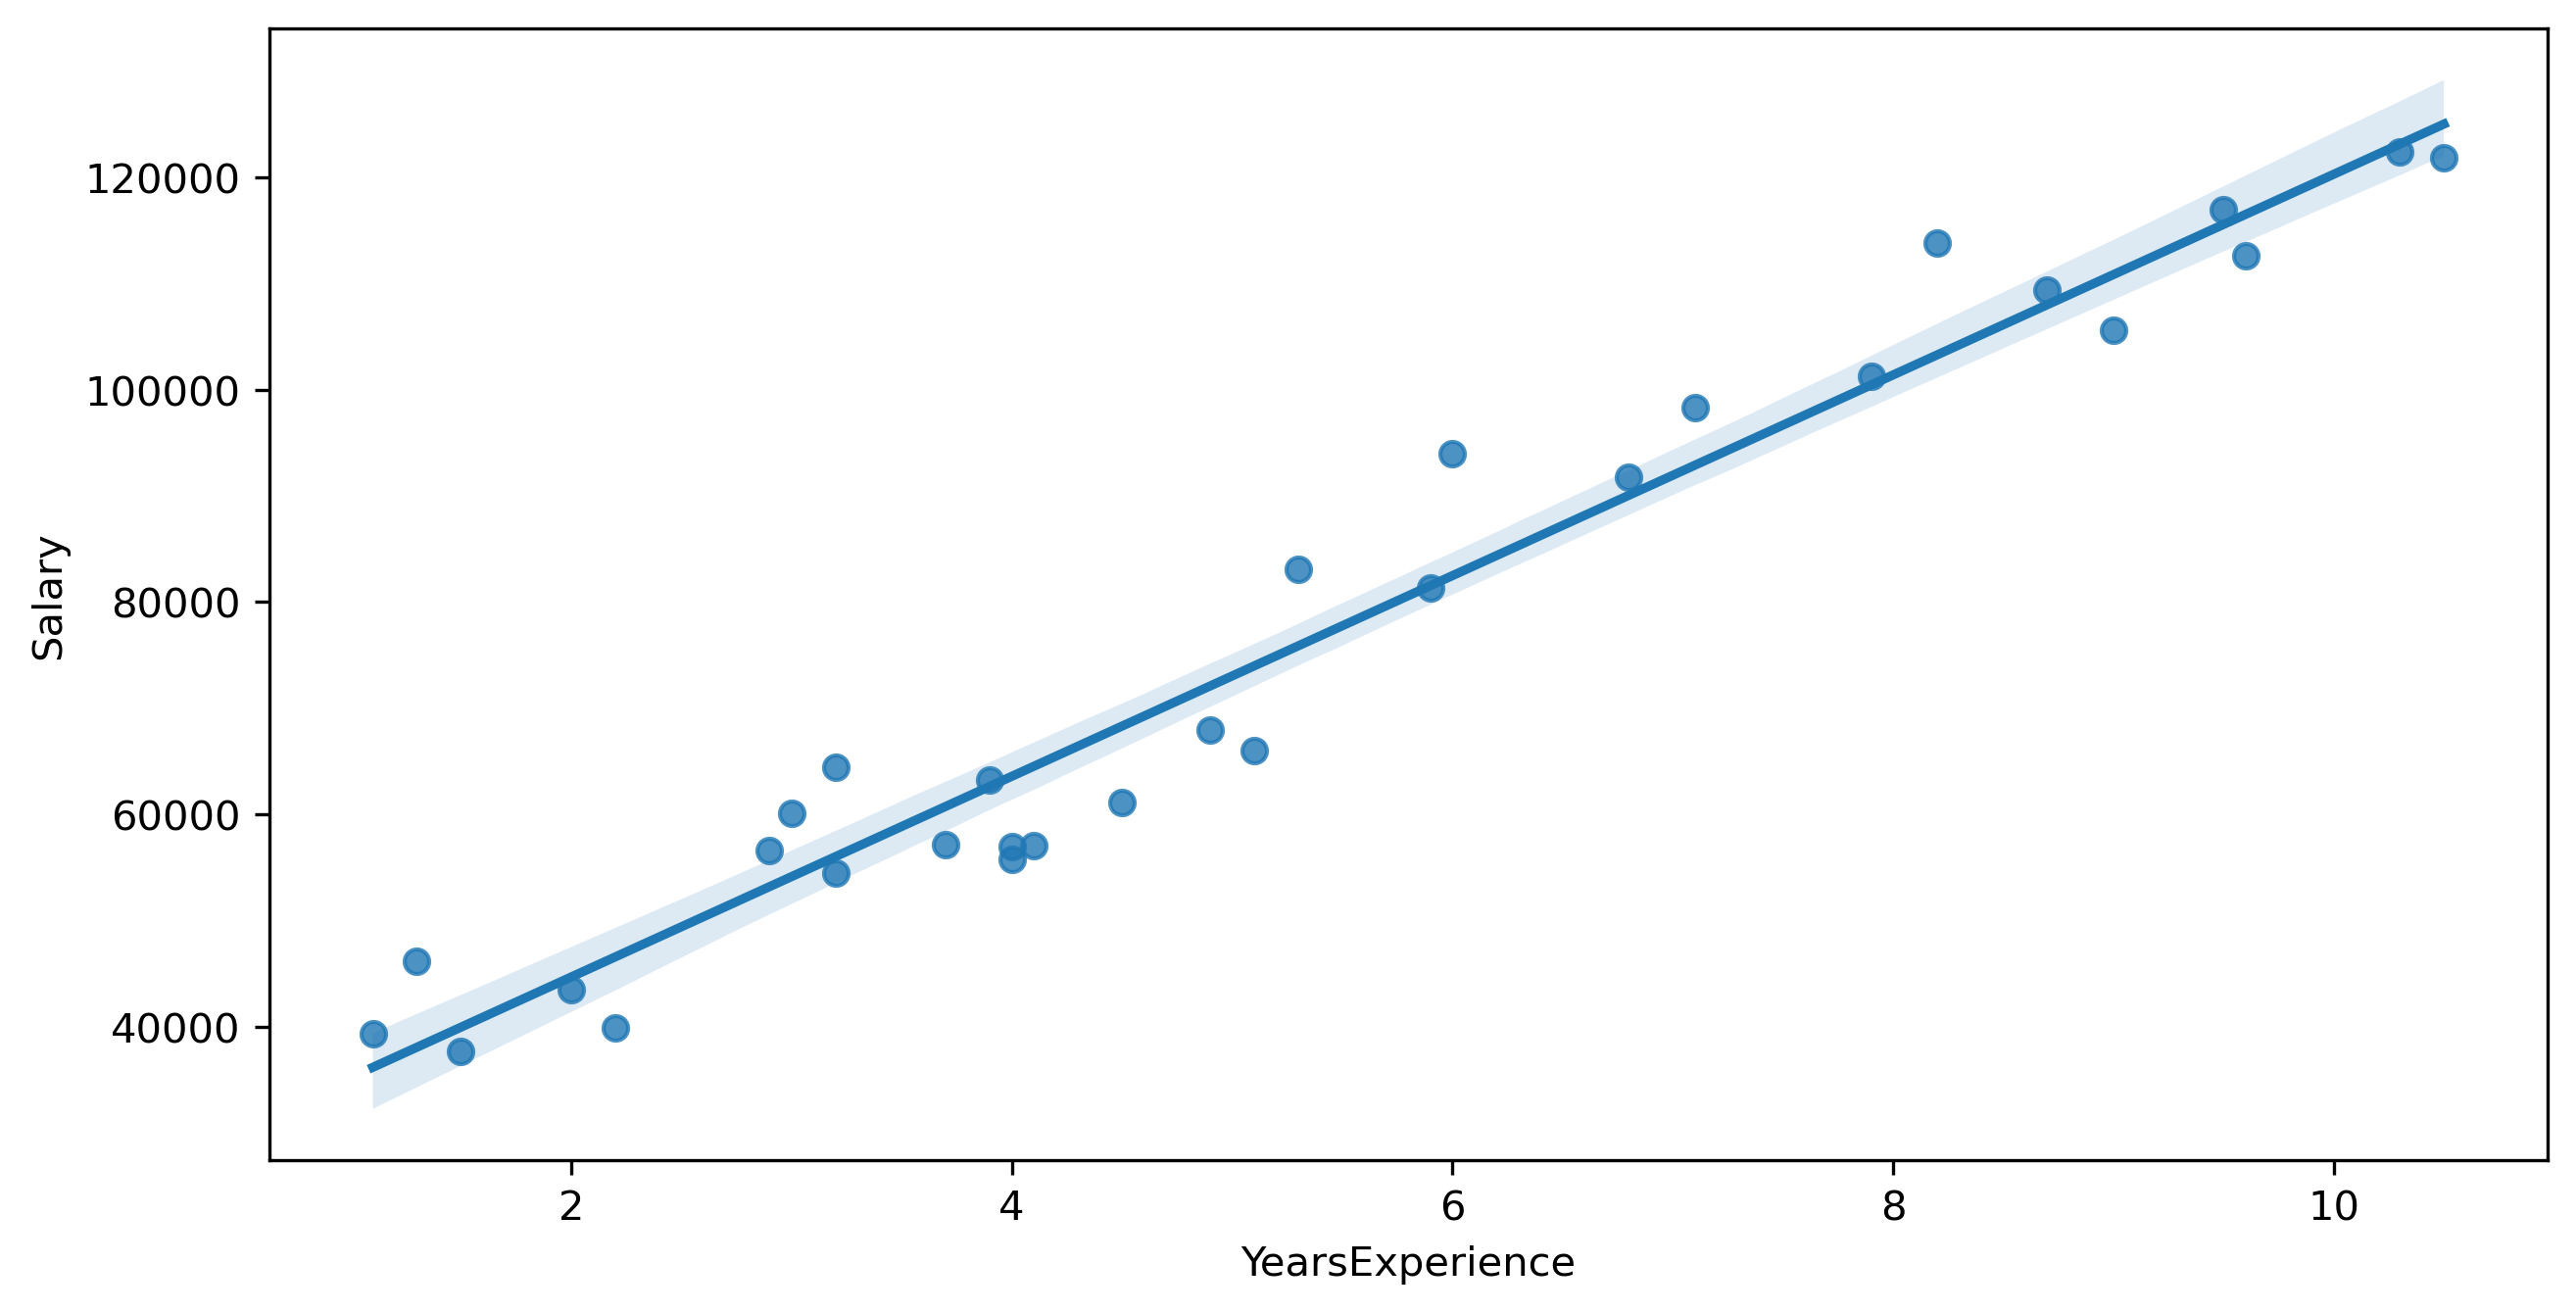

In [13]:
sns.regplot(y=df['Salary'], x=df['YearsExperience'])

In [14]:
df.corr(numeric_only= 'True')

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

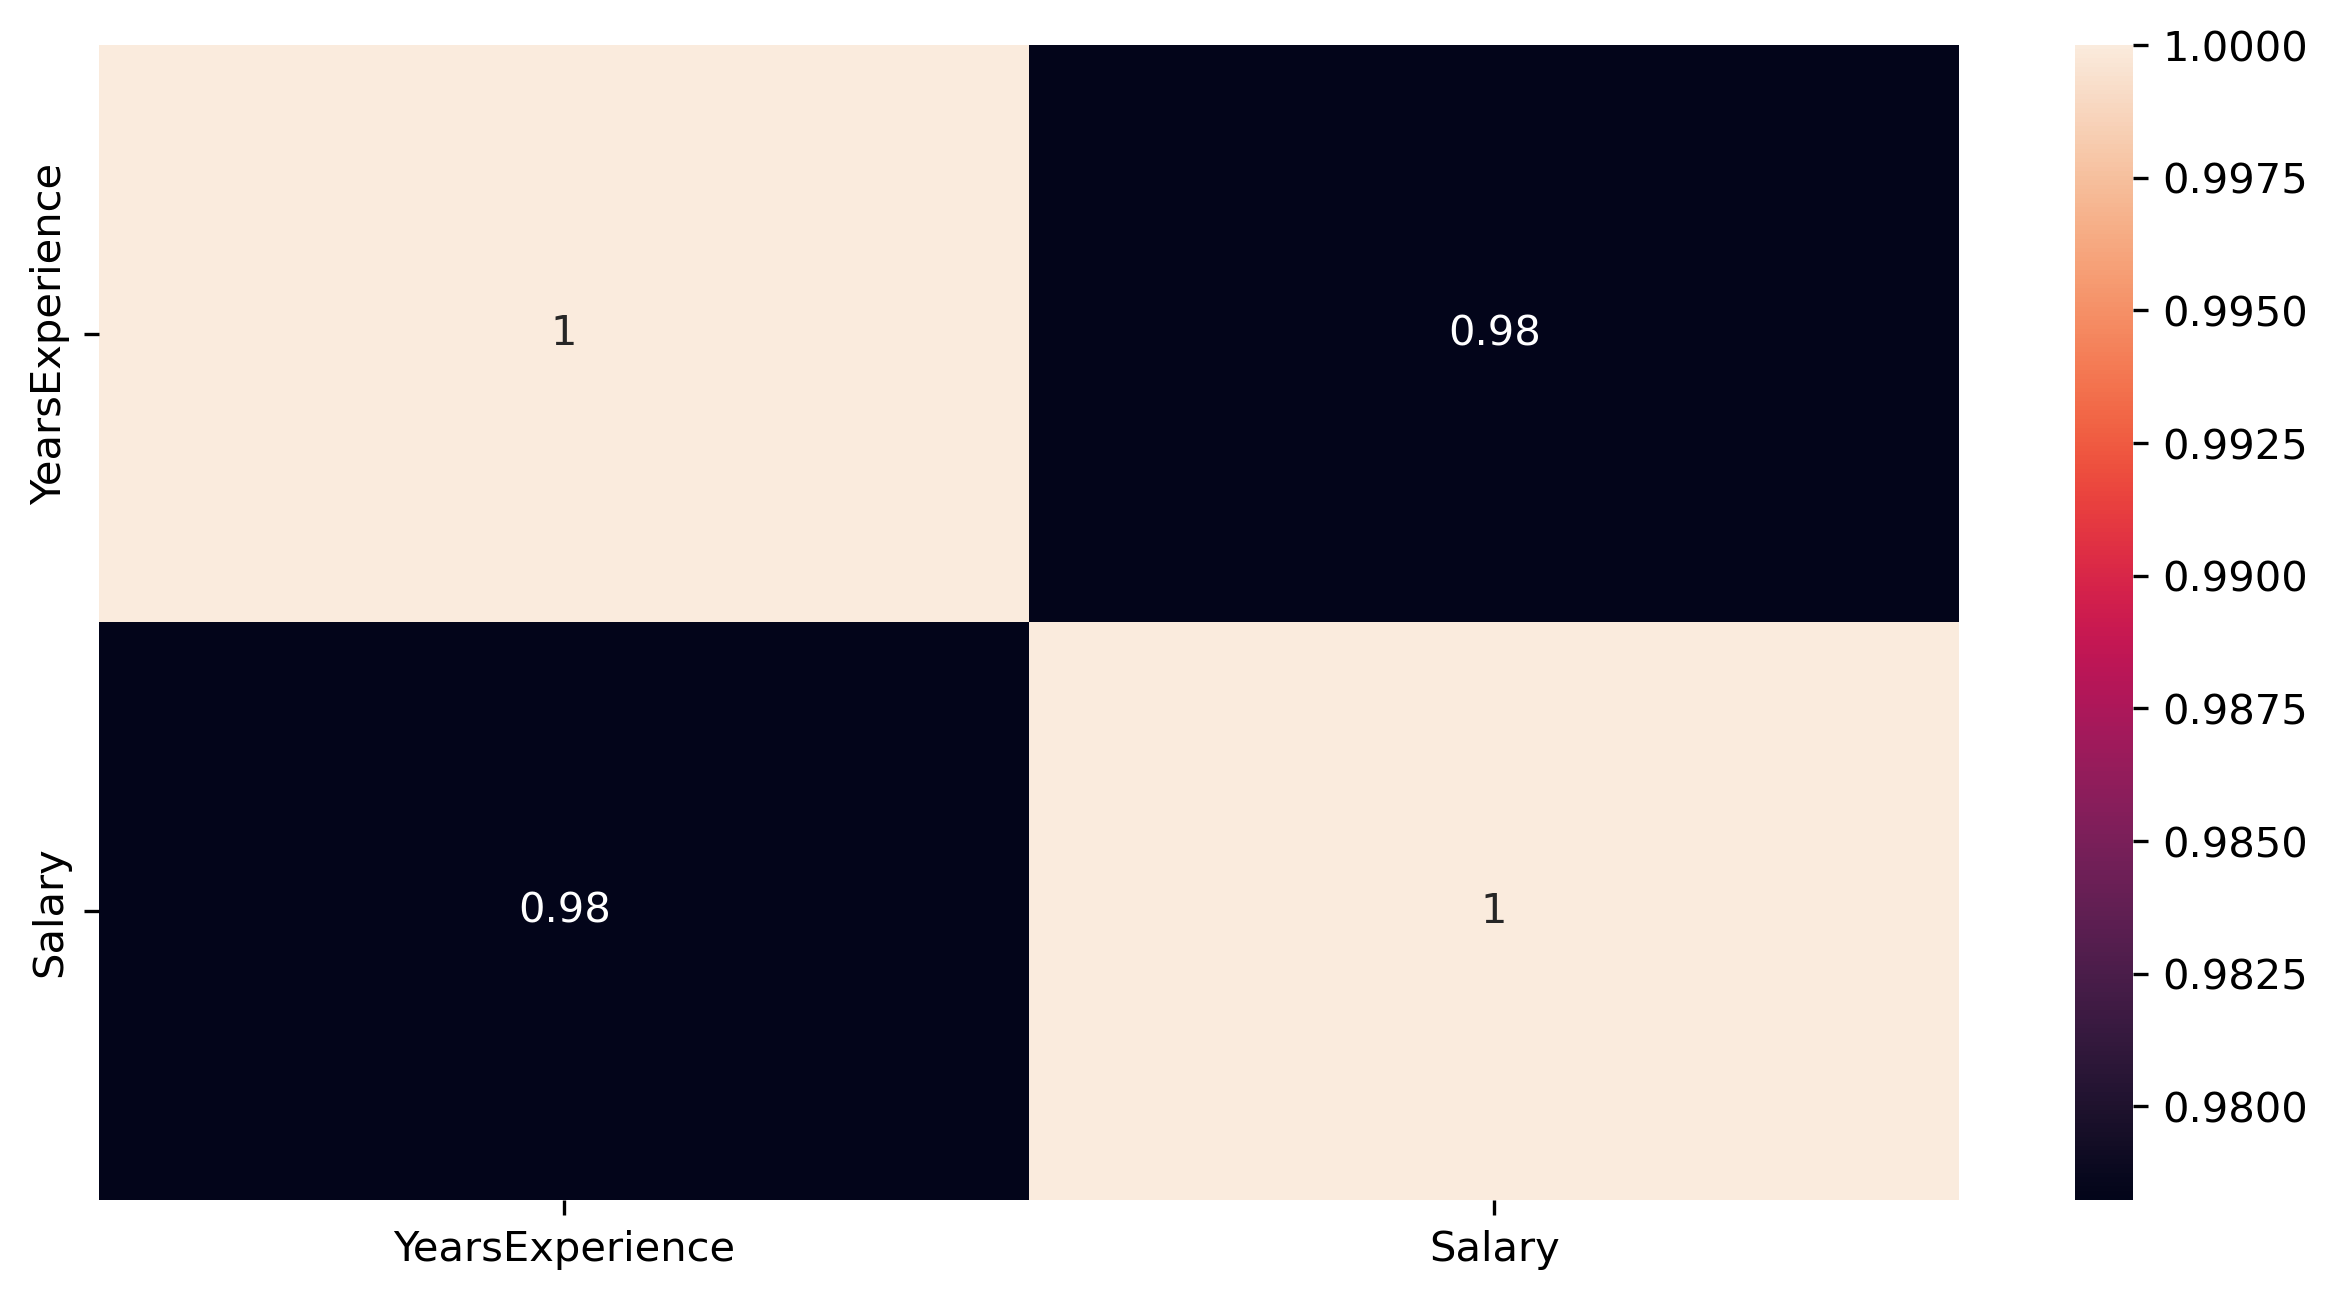

In [15]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

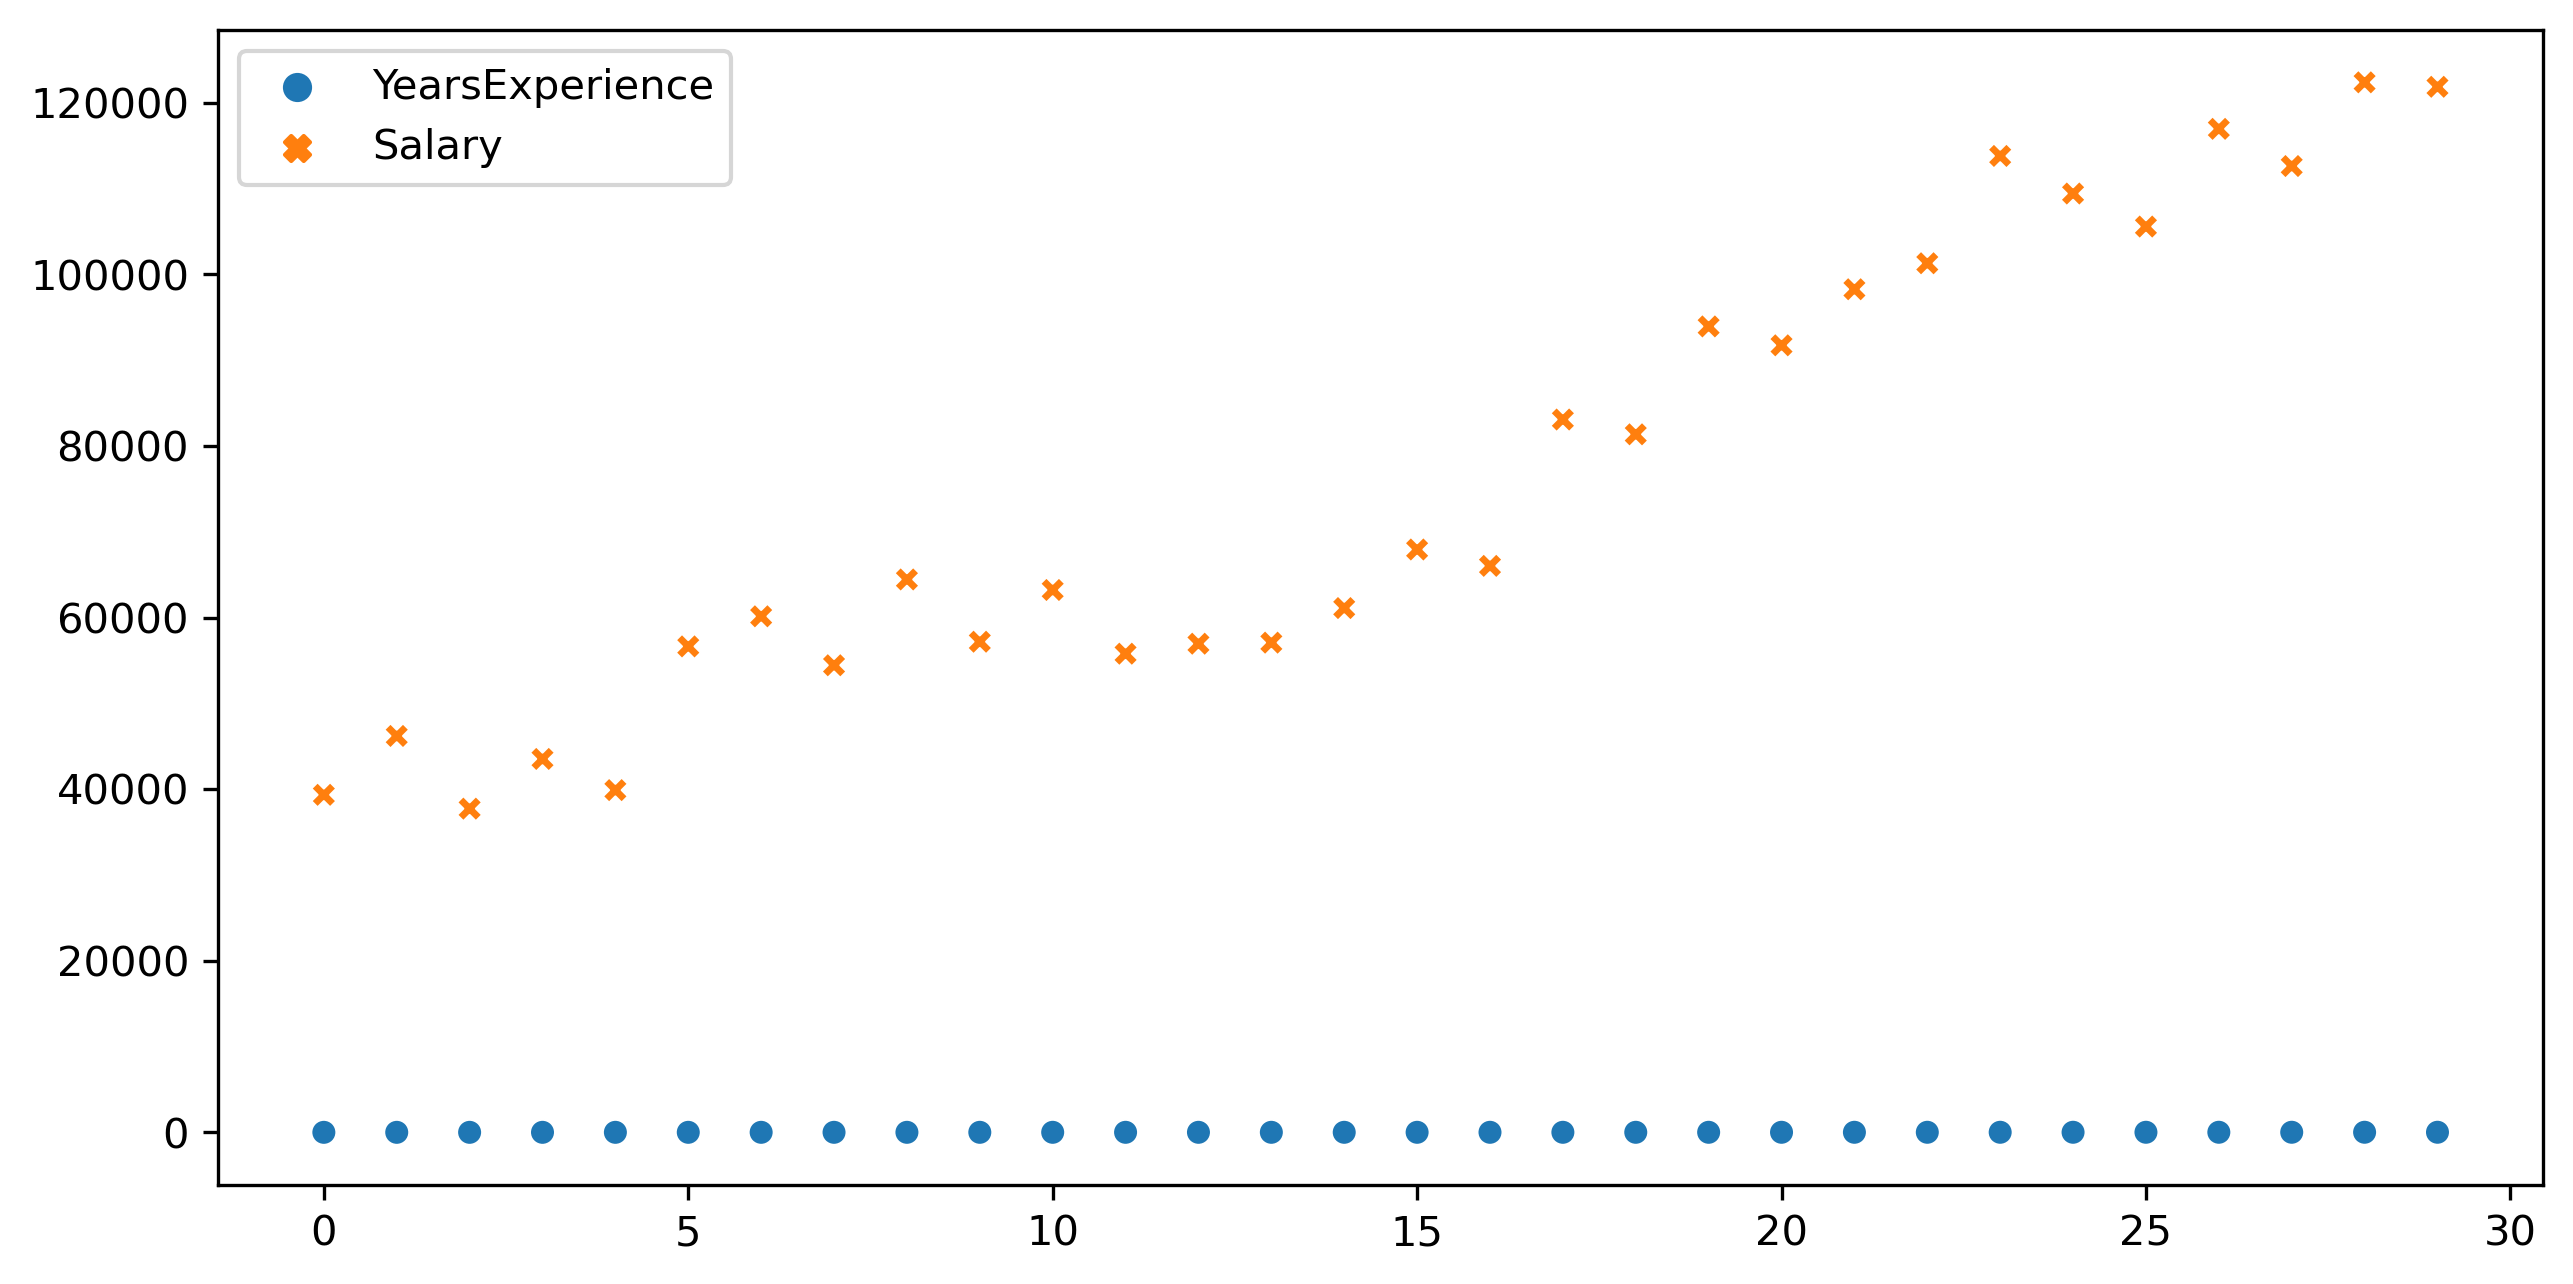

In [16]:
sns.scatterplot(df)

#### <font color = 'Brown'> From above regression plot and correlation coefficient we can say that they are having strong positive relations in between columns. The score is close to +1 which is good for positive related datas.

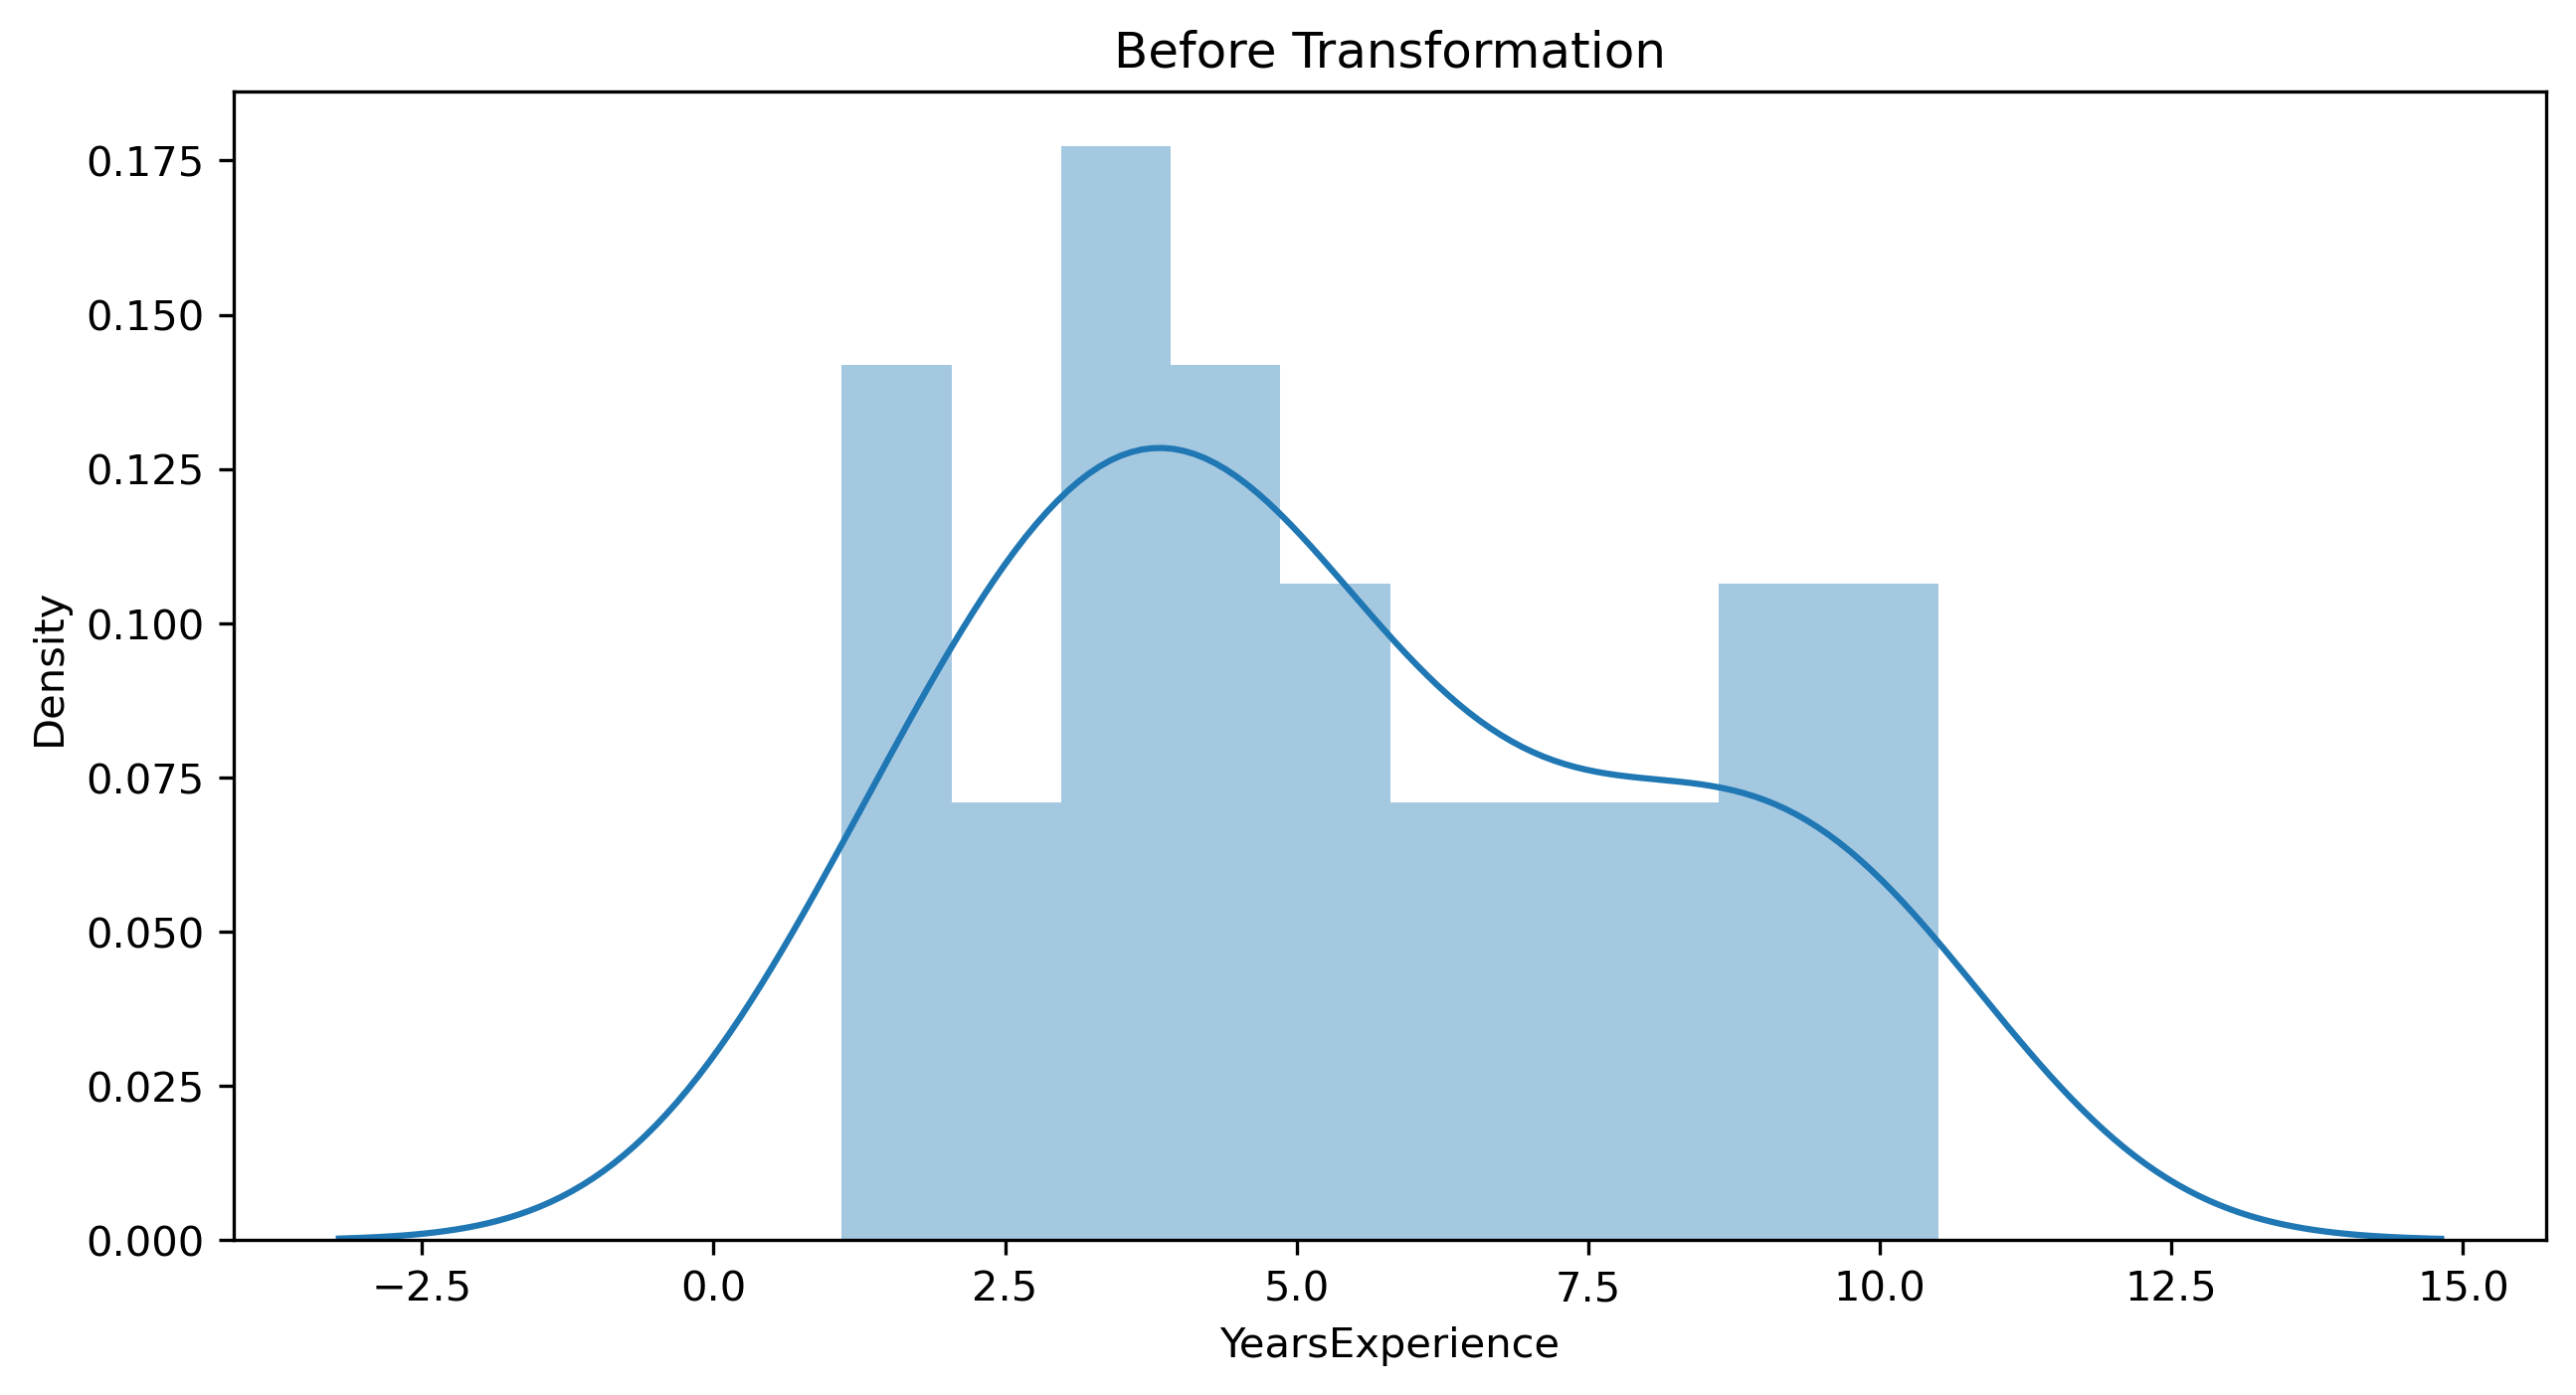

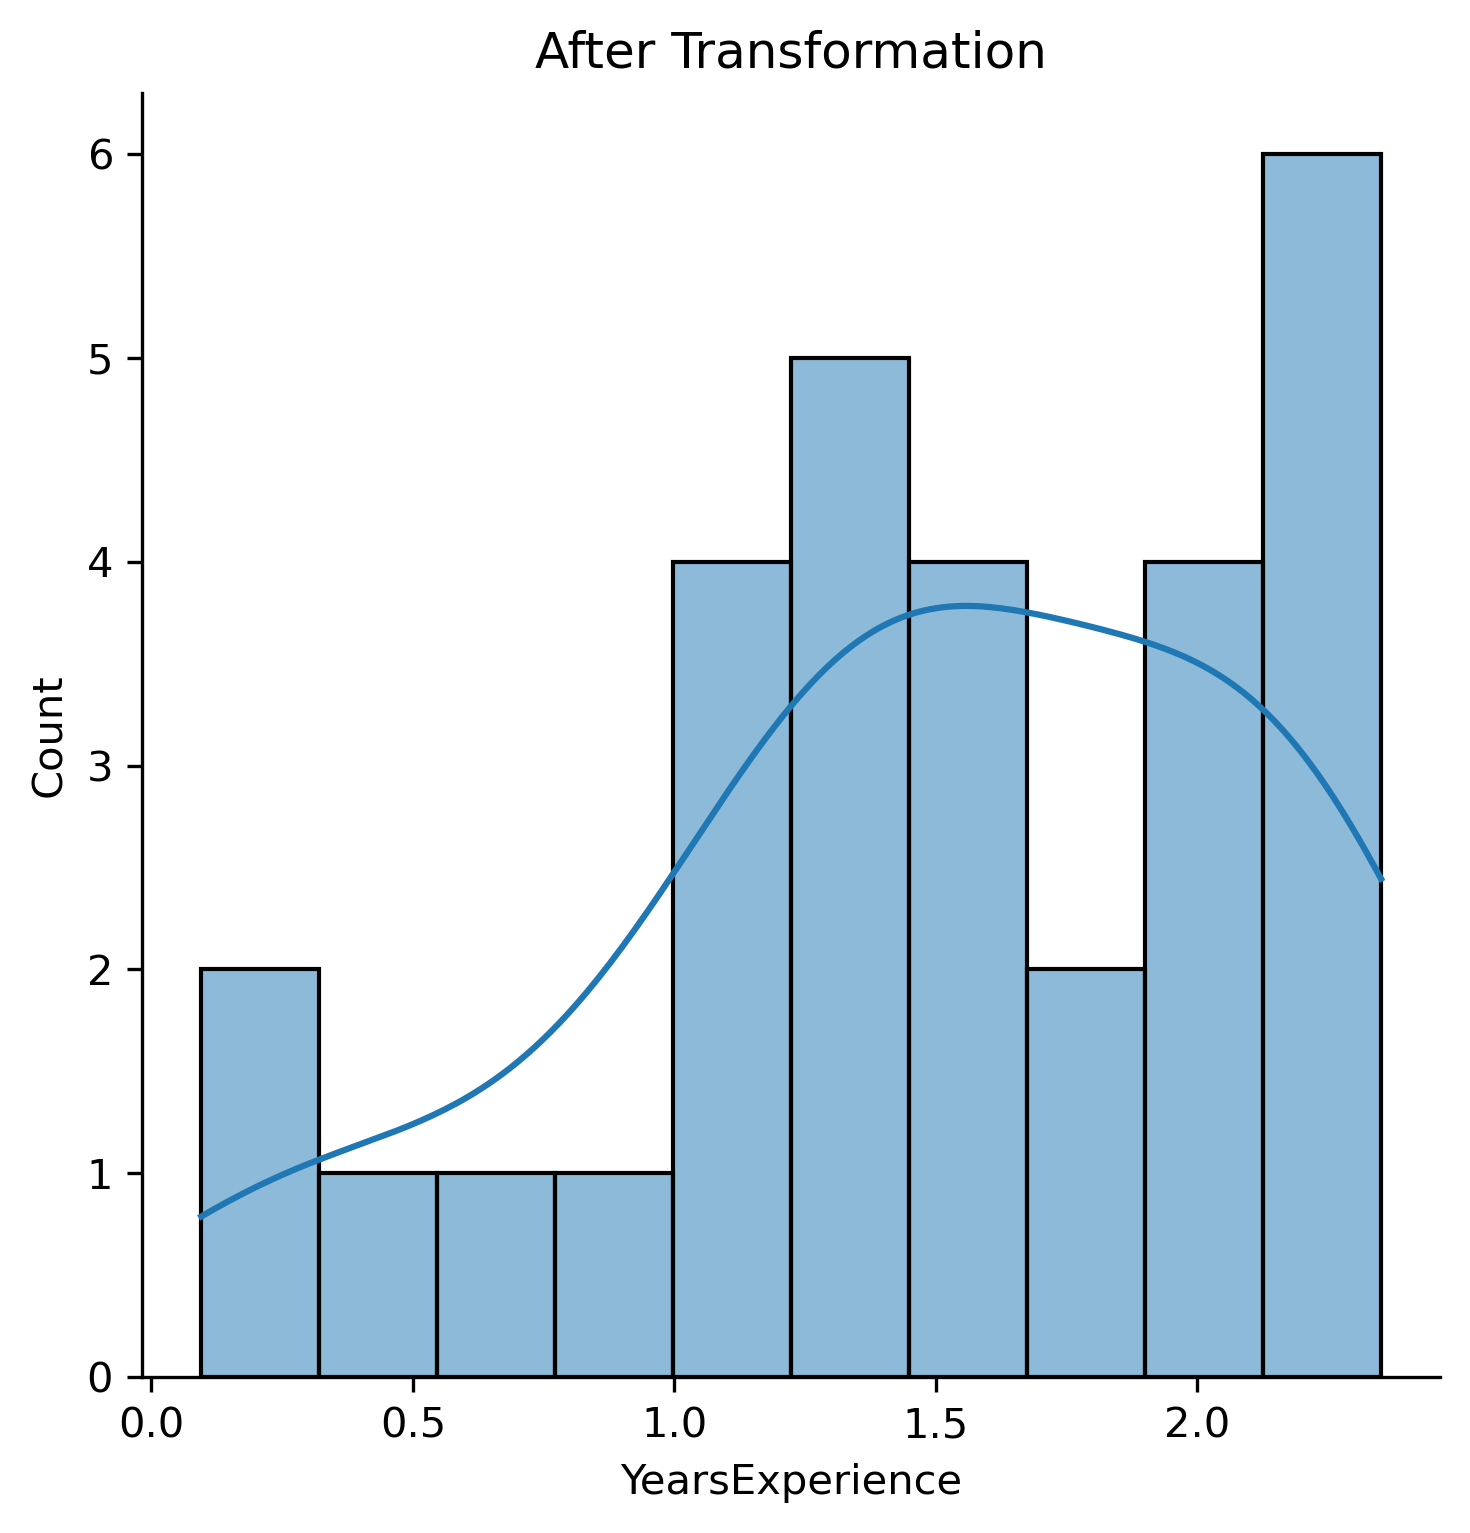

In [18]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

#### Fiting a linaer regression model

In [19]:
model=smf.ols("Salary~YearsExperience",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        14:50:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Square root transformation model

In [21]:
model1 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           7.58e-19
Time:                        14:51:36   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log transformation model

In [23]:
model2 = smf.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           7.40e-16
Time:                        14:52:07   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Testing

In [43]:
model.params  #model parameters slope and intercept

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [46]:
model.pvalues #pvalues  of model

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [47]:
#r2 value
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

##### Calculating  predicted salaries

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
model1_pred_y =np.square(model1.predict(df['YearsExperience']))
model2_pred_y =np.exp(model2.predict(df['YearsExperience']))

In [29]:
model1_rmse =np.sqrt(mean_squared_error(df['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['Salary'], model2_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'Square root=', model1_rmse,'\n' 'Log=', model2_rmse)

model= 5788.315051119395 
Square root= 5960.647096174311 
Log= 7219.716974372802


#### Predicting values on original model

In [35]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = df.YearsExperience
predicted2['Salary'] = df.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(df.YearsExperience))
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


### Predicted values on Log model

In [34]:
predicted = pd.DataFrame()
predicted['YearsExperience'] = df.YearsExperience
predicted['Salary'] = df.Salary
predicted['Predicted_Salary_Hike'] = pd.DataFrame(np.square(model1.predict(df['YearsExperience'])))
predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,33447.371655
1,1.3,46205.0,36022.521569
2,1.5,37731.0,38491.193991
3,2.0,43525.0,44318.949727
4,2.2,39891.0,46544.135171
5,2.9,56642.0,53989.336270
6,3.0,60150.0,55017.323598
7,3.2,54445.0,57051.041838
8,3.2,64445.0,57051.041838
9,3.7,57189.0,62020.592218
